In [5]:
import cv2
from plt_utils import plt_imgshow
cv2.__version__

'4.8.1'

In [2]:
def is_inside(i, o):
    ix, iy, iw, ih = i
    ox, oy, ow, oh = o
    return ix > ox and ix + iw < ox + ow and \
        iy > oy and iy + ih < oy + oh

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

img = cv2.imread('../images/haying.jpg')

# OpenCV 4.6 or a later version is being used.
found_rects, found_weights = hog.detectMultiScale(
    img, winStride=(4, 4), scale=1.02, groupThreshold=1.9)

found_rects_filtered = []
found_weights_filtered = []
for ri, r in enumerate(found_rects):
    for qi, q in enumerate(found_rects):
        if ri != qi and is_inside(r, q):
            break
    else:
        found_rects_filtered.append(r)
        found_weights_filtered.append(found_weights[ri])

for ri, r in enumerate(found_rects_filtered):
    x, y, w, h = r
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 255), 2)
    text = '%.2f' % found_weights_filtered[ri]
    cv2.putText(img, text, (x, y - 20),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

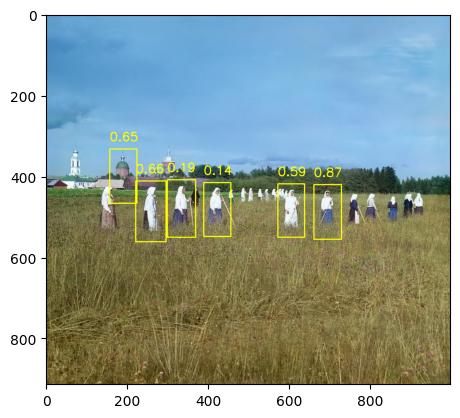

In [6]:
plt_imgshow(img)